In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Source: www.numbeo.com/cost-of-living/cpi_explained.jsp

# Understanding our Cost of Living Indexes
# *******The cost of living indices provided on this website are relative to New York City (NYC), with a baseline index of 100% for NYC.*******

# Here's a breakdown of each index and its meaning:
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Cost of Living Index (Excl. Rent): This index indicates the relative prices of consumer goods like groceries, restaurants, transportation, and utilities. 
                                    # It excludes accommodation expenses such as rent or mortgage. 
                                    # For instance, a city with a Cost of Living Index of 120 is estimated to be 20% more expensive than New York City (excluding rent).
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Rent Index: This index estimates the prices of renting apartments in a city compared to New York City. 
            # If the Rent Index is 80, it suggests that the average rental prices in that city are approximately 20% lower than those in New York City.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Cost of Living Plus Rent Index: This index estimates consumer goods prices, including rent, in comparison to New York City.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Groceries Index: This index provides an estimation of grocery prices in a city relative to New York City. 
                 # Numbeo uses item weights from the "Markets" section to calculate this index for each city.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Restaurants Index: This index compares the prices of meals and drinks in restaurants and bars to those in NYC.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Local Purchasing Power: This index indicates the relative purchasing power in a given city based on the average net salary.
                        # A domestic purchasing power of 40 means that residents with an average salary can afford, on average, 60% less goods and services compared to residents of New York City with an average salary.
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# For more details on the weights and formulas used, please refer to: www.numbeo.com/common/motivation_and_methodology.jsp
# ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
df_main = pd.read_csv("Cost_of_Living_Index_by_Country_2024.csv")

In [3]:
df = df_main.copy()

In [4]:
df.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [5]:
df.set_index("Rank",inplace=True)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cost of Living Index,121.0,43.555372,16.147574,18.8,30.2,39.5,52.8,101.1
Rent Index,121.0,16.052893,11.412267,2.4,8.5,12.4,20.1,67.2
Cost of Living Plus Rent Index,121.0,30.357851,13.263721,11.1,19.8,27.0,37.0,74.9
Groceries Index,121.0,44.228926,17.055109,17.5,31.6,40.5,53.7,109.1
Restaurant Price Index,121.0,36.471074,18.258110,12.8,21.6,33.1,47.2,97.0
Local Purchasing Power Index,121.0,65.094215,39.569094,2.3,34.8,50.6,99.4,182.5


In [7]:
df.dtypes

Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 1 to 121
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         121 non-null    object 
 1   Cost of Living Index            121 non-null    float64
 2   Rent Index                      121 non-null    float64
 3   Cost of Living Plus Rent Index  121 non-null    float64
 4   Groceries Index                 121 non-null    float64
 5   Restaurant Price Index          121 non-null    float64
 6   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), object(1)
memory usage: 7.6+ KB


In [9]:
df.isnull().sum()

Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [10]:
df.shape

(121, 7)

In [11]:
unique_cts = df['Country'].nunique()
unique_cts

121

Bu verisetini incelediğimizde , verilerin NYC'ye göre oluşturulduğunu , herhangi boş veya aykırı bir veri olmadığını görüyoruz. Country sütunu dışındaki sütunların float değerler olması da değerlerde herhangi bir sorun olmadığı anlamına geliyor. Country sütunundaki unique değerlerin sayısına bakarak aynı ülkeden birden fazla kez olmadığı anlaşılıyor.Ayrıca Rank sütununu index haline getirerek karmaşıklığı bir tık daha azalttım.

In [12]:
columns = ['Cost of Living Index',
 'Rent Index',
 'Cost of Living Plus Rent Index',
 'Groceries Index',
 'Restaurant Price Index',
 'Local Purchasing Power Index']

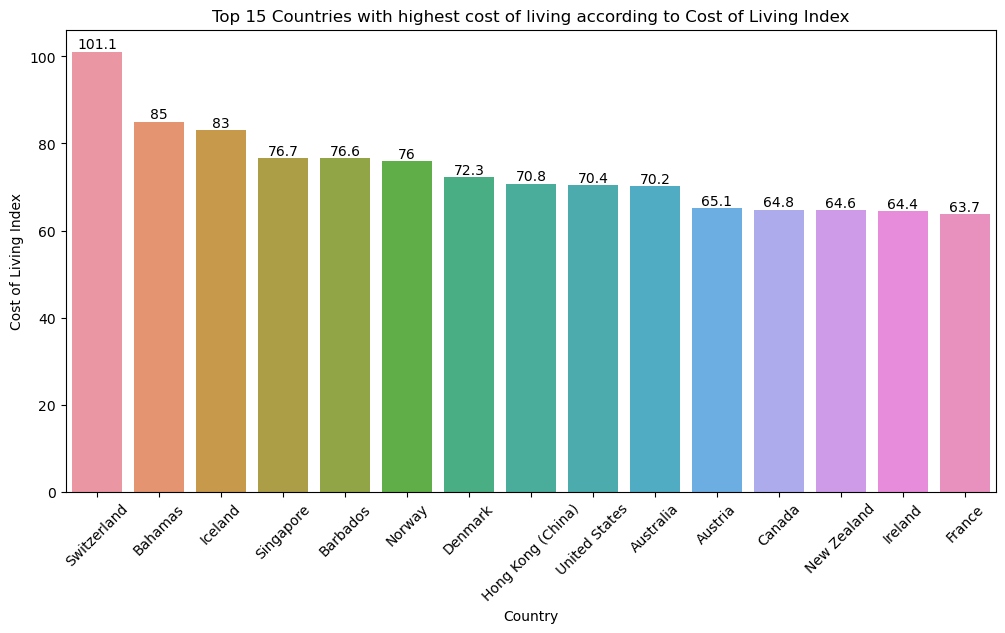

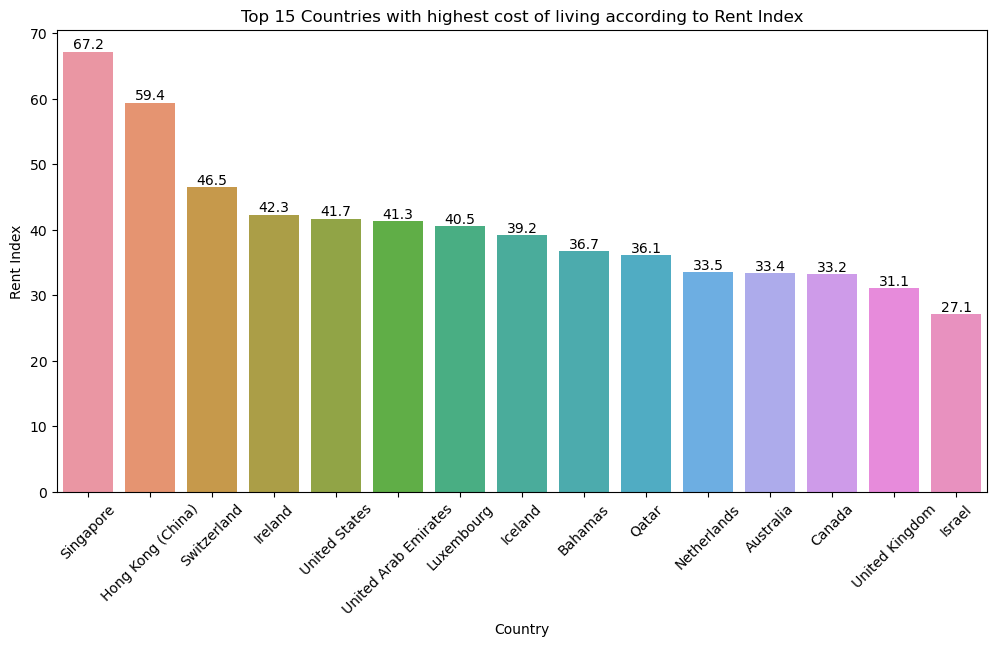

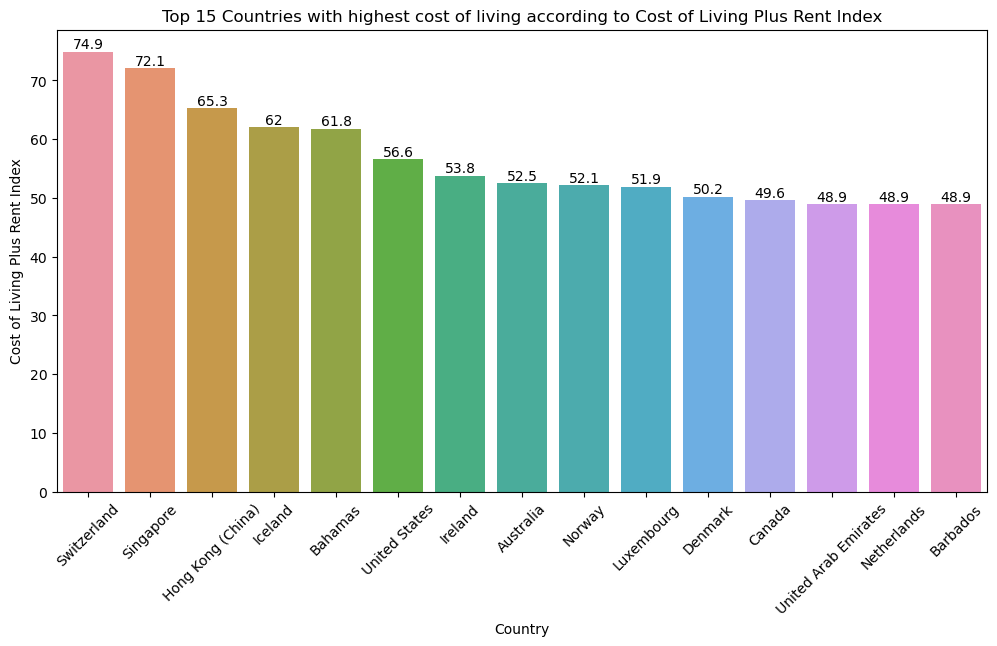

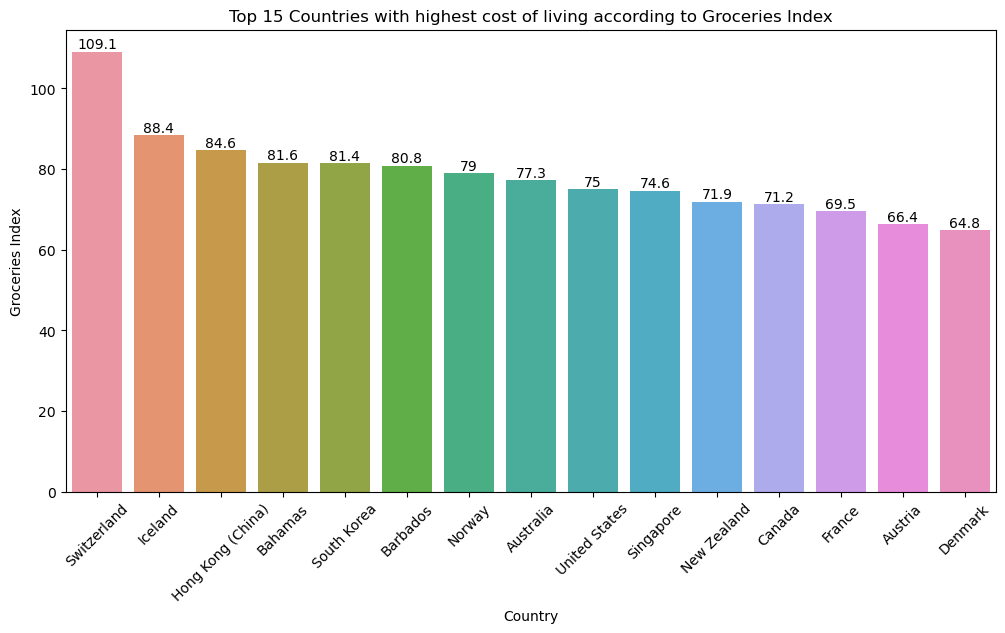

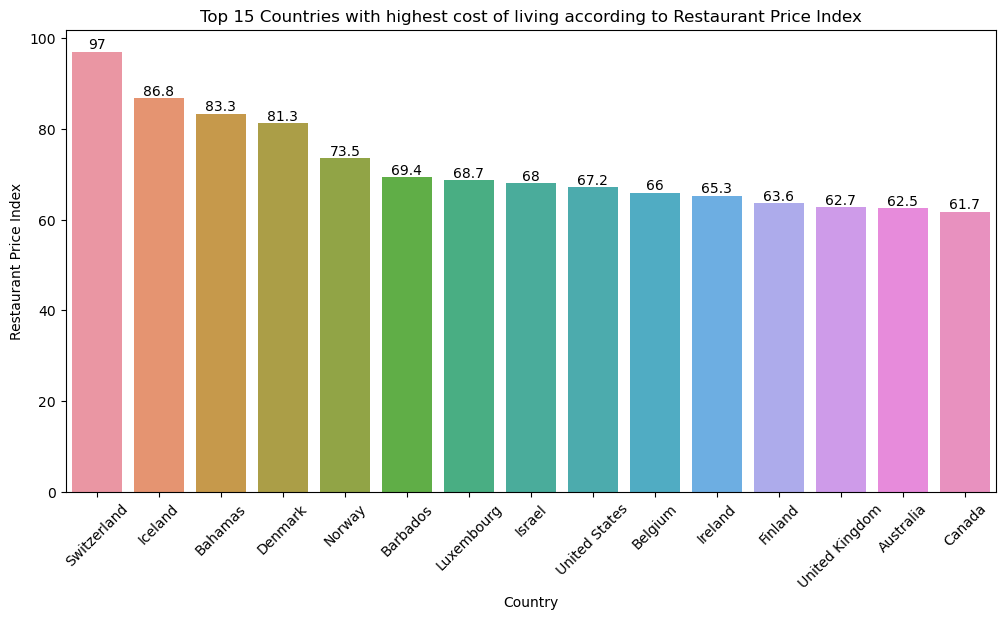

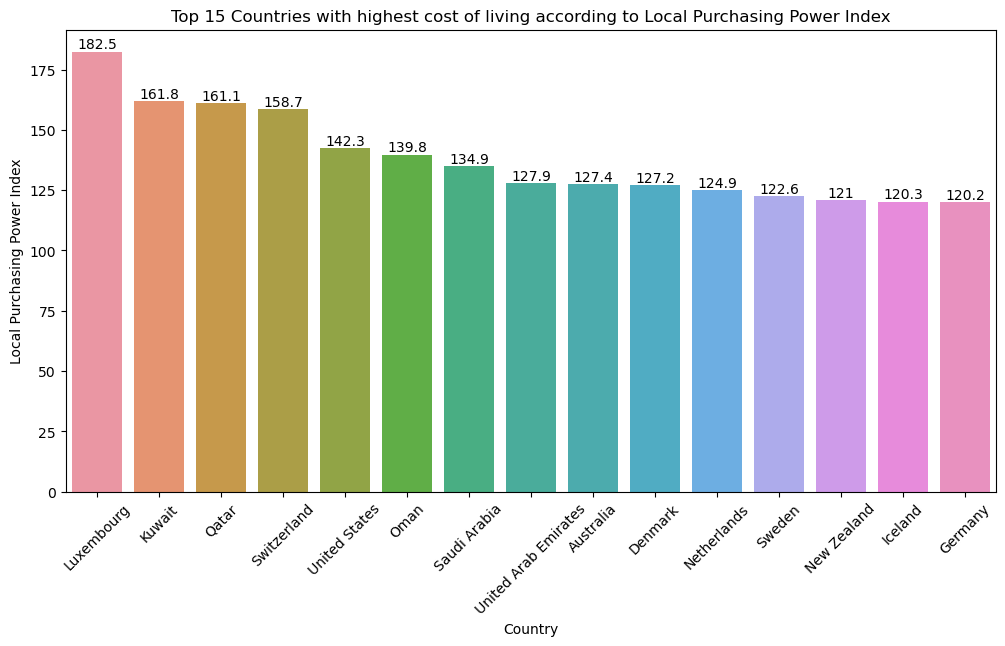

In [13]:
for i in columns:
    df_top = df.sort_values(by=[i], ascending=False).head(15)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_top, x="Country", y=i)
    plt.xticks(rotation=45)
    plt.title(f"Top 15 Countries with highest cost of living according to {i}")
    ax.bar_label(ax.containers[0])
    plt.show()

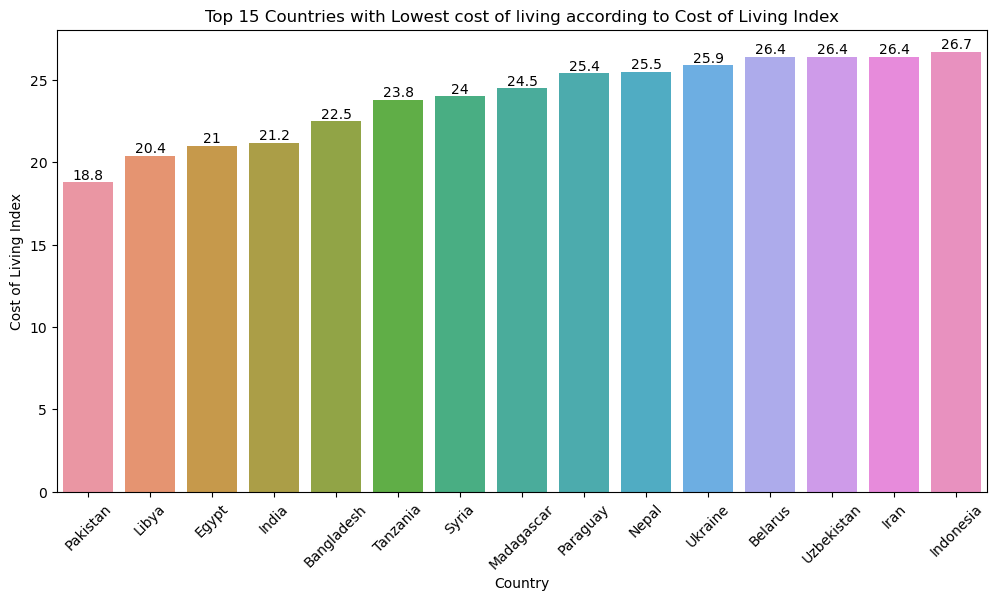

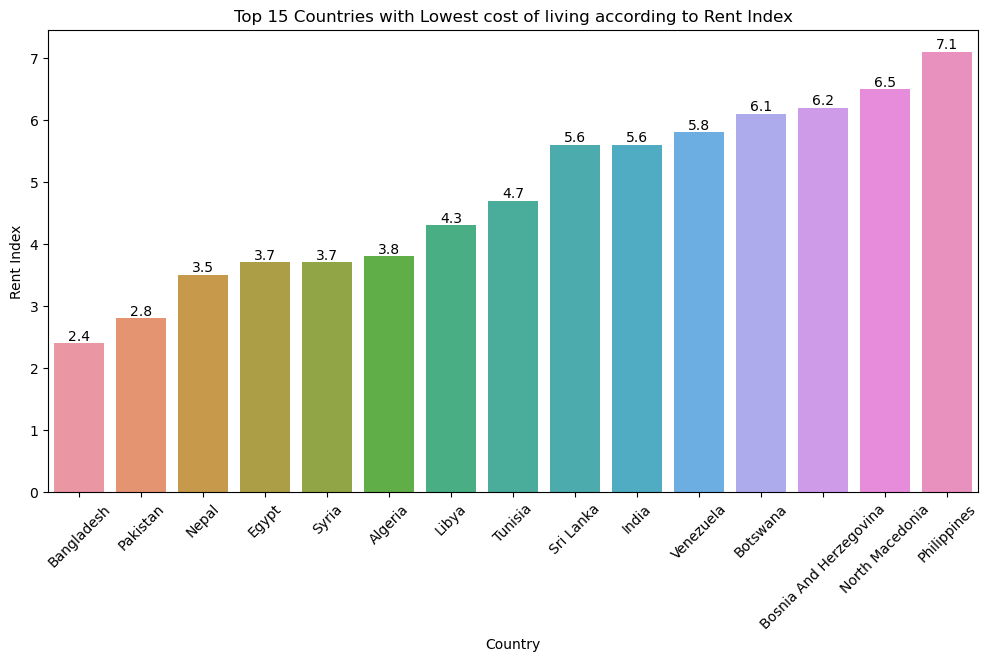

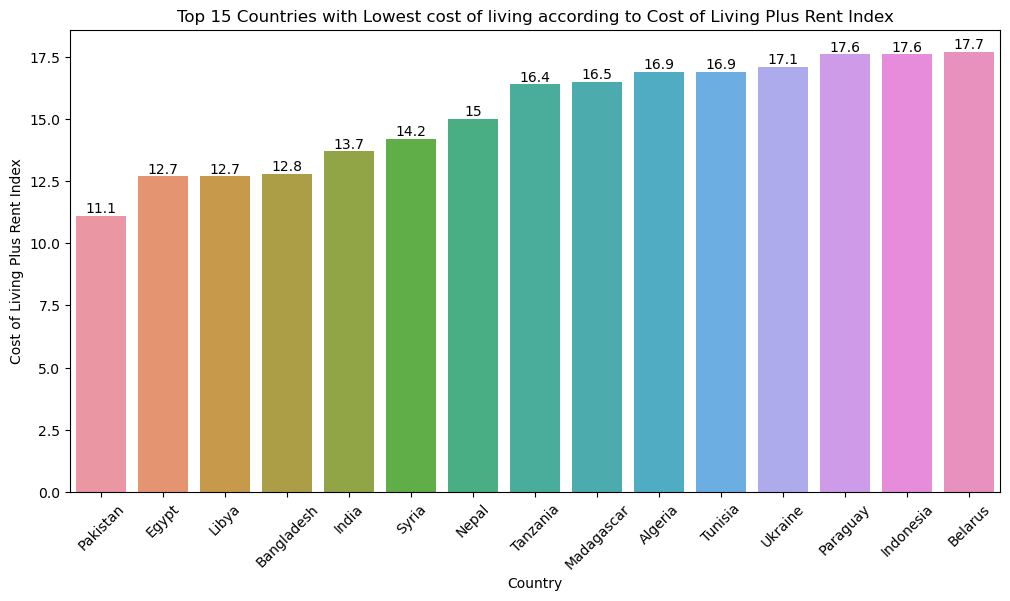

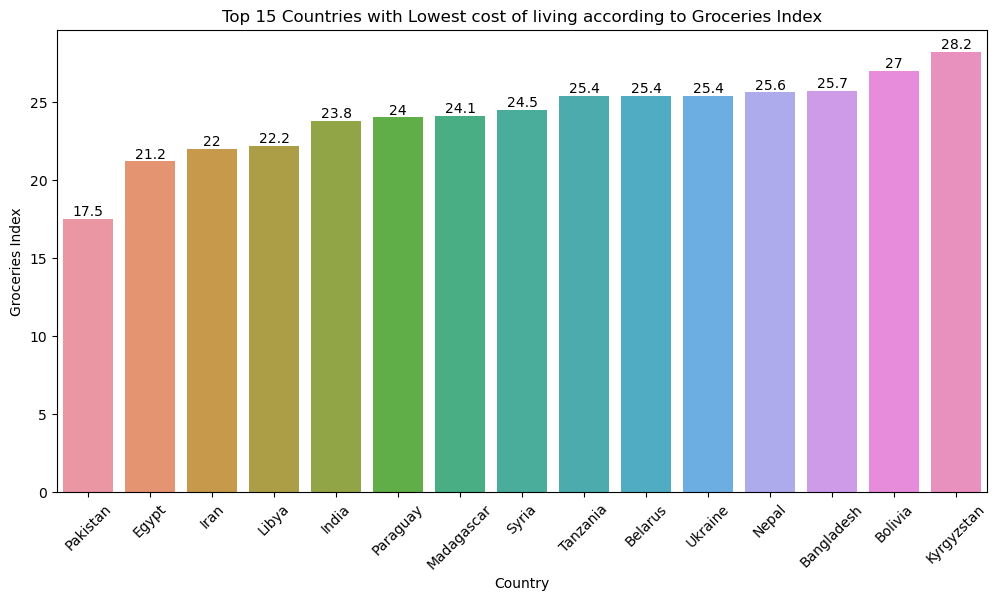

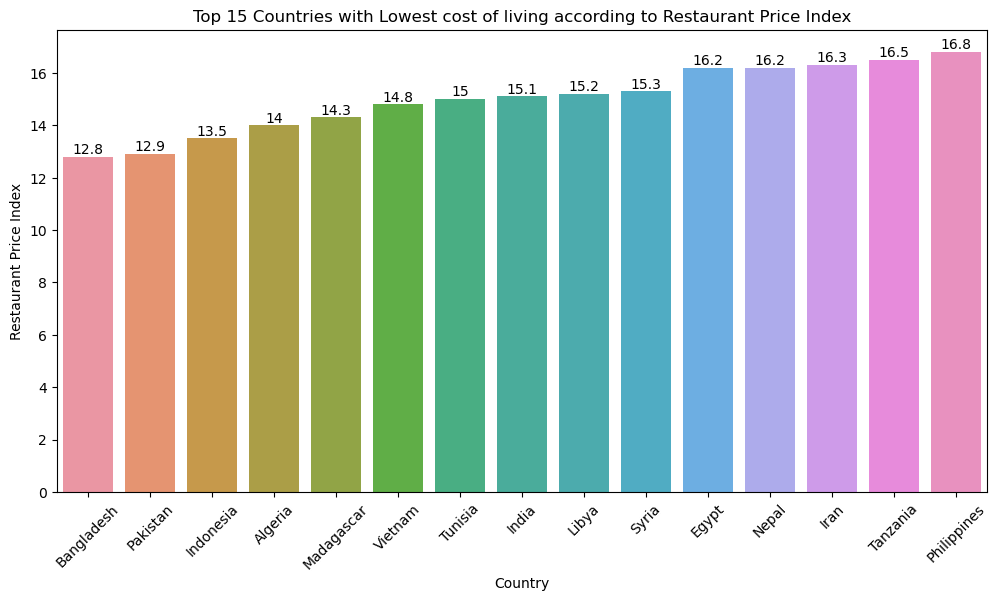

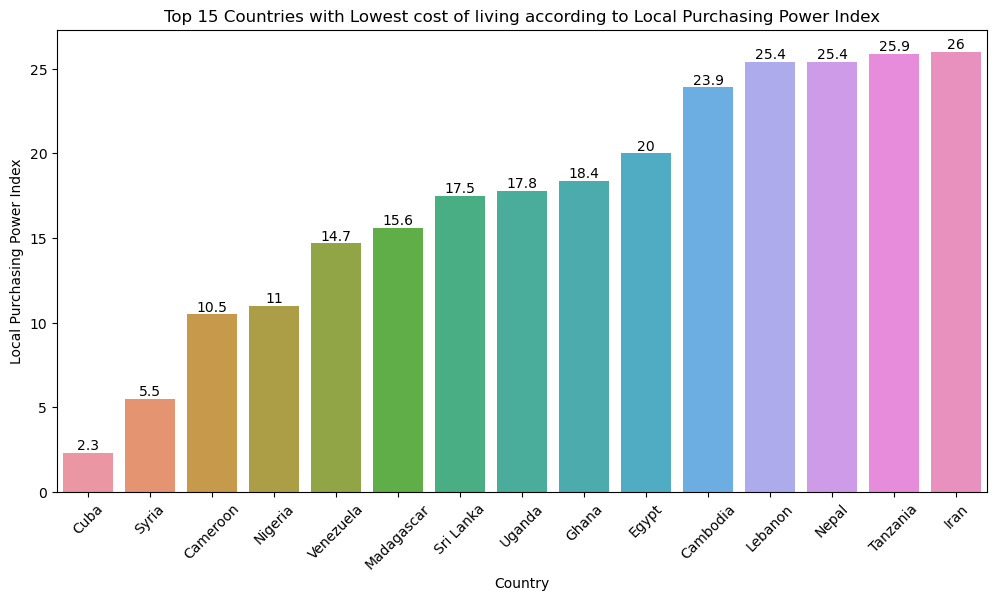

In [14]:
for i in columns:
    df_top = df.sort_values(by=[i], ascending=True).head(15)
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df_top, x="Country", y=i)
    plt.xticks(rotation=45)
    plt.title(f"Top 15 Countries with Lowest cost of living according to {i}")
    ax.bar_label(ax.containers[0])
    plt.show()

In [15]:
top_15_cts = df.sort_values(by="Cost of Living Index",ascending=False).head(15)
lowest_15_cts = df.sort_values(by="Cost of Living Index").head(15)

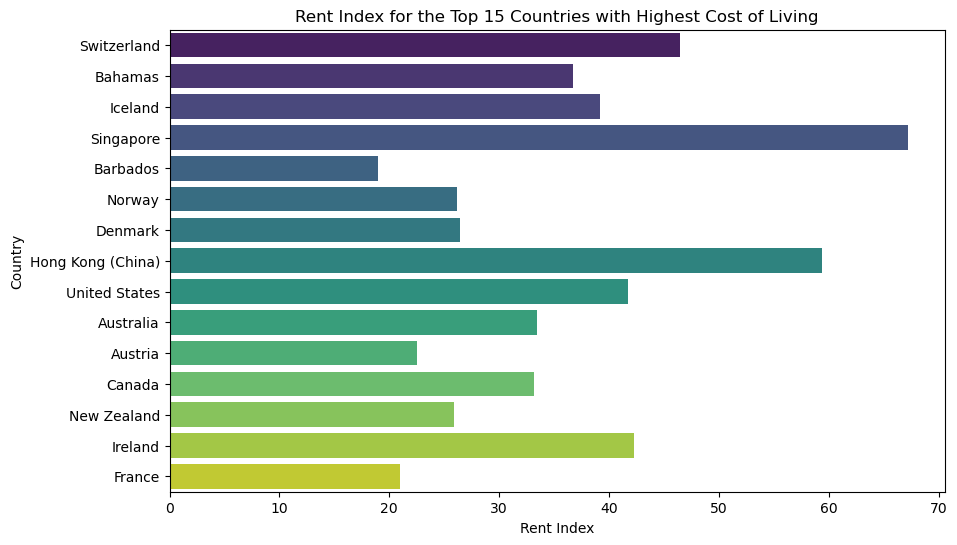

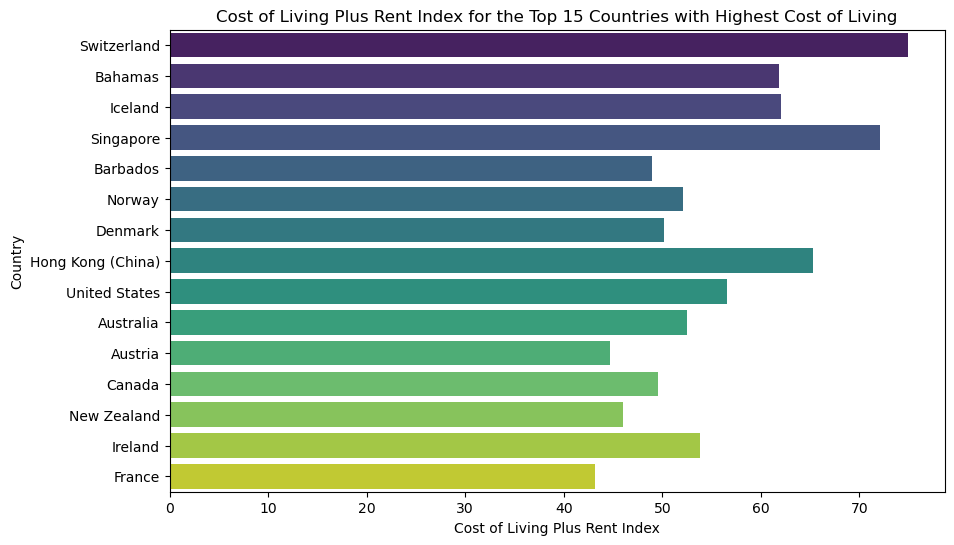

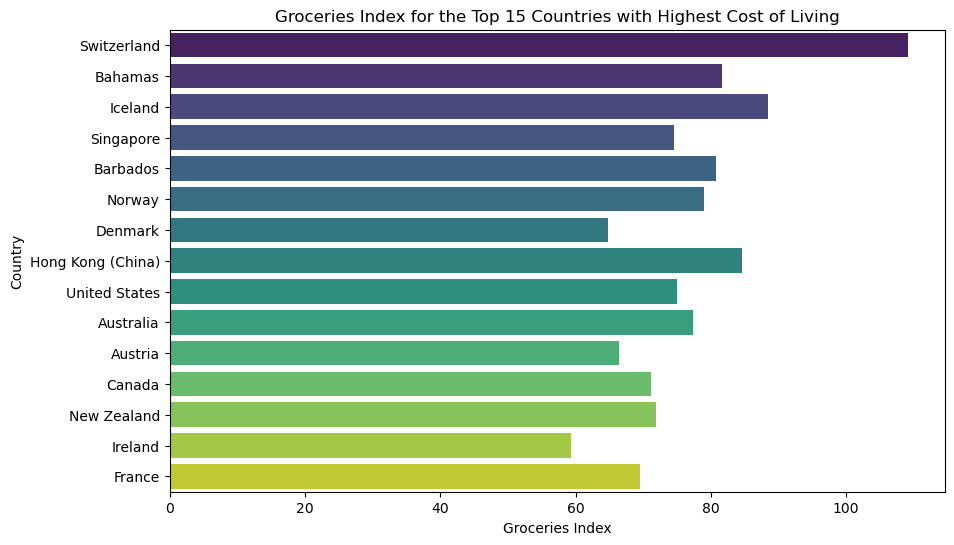

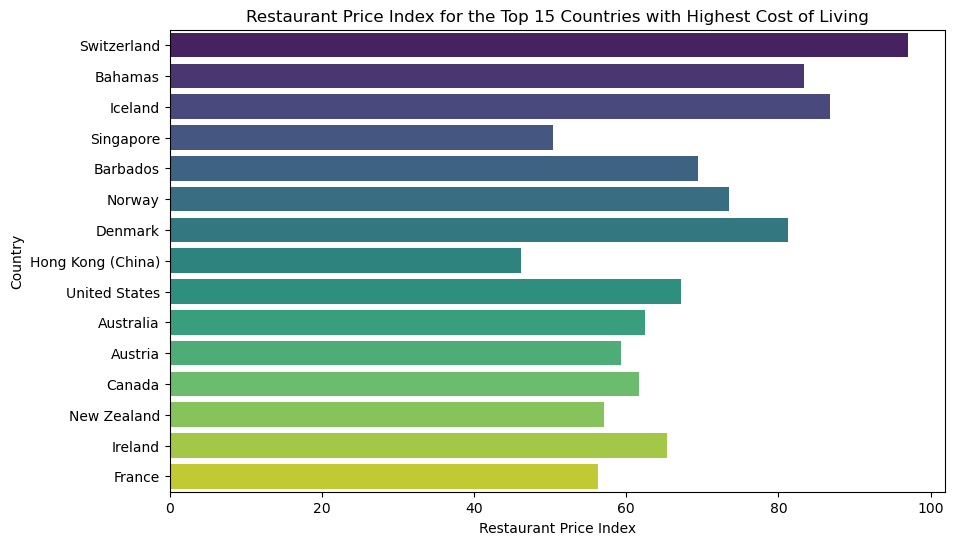

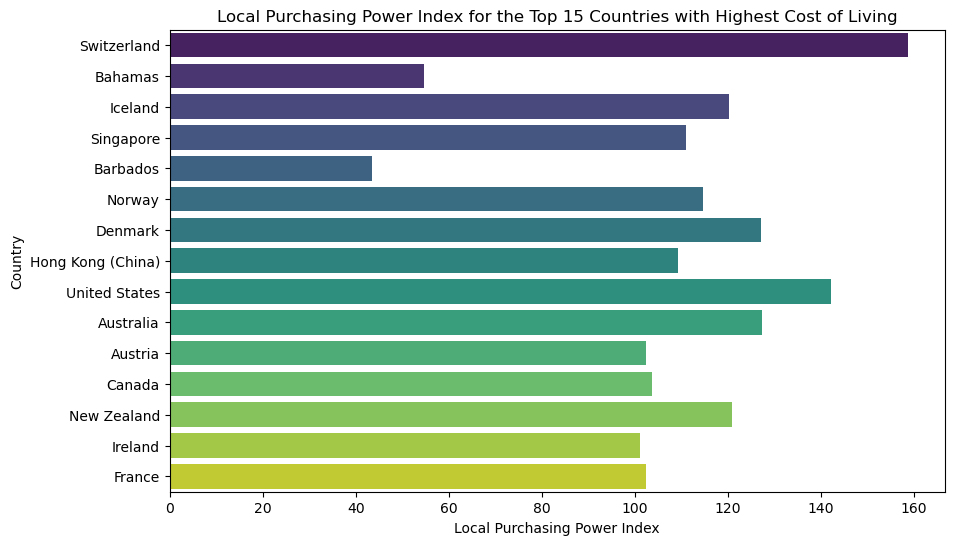

In [16]:
for a in columns:
    if a != "Cost of Living Index":
        plt.figure(figsize=(10, 6))
        sns.barplot(data=top_15_cts, x=a, y='Country', palette='viridis')
        plt.title(f'{a} for the Top 15 Countries with Highest Cost of Living')
        plt.xlabel(a)
        plt.show()

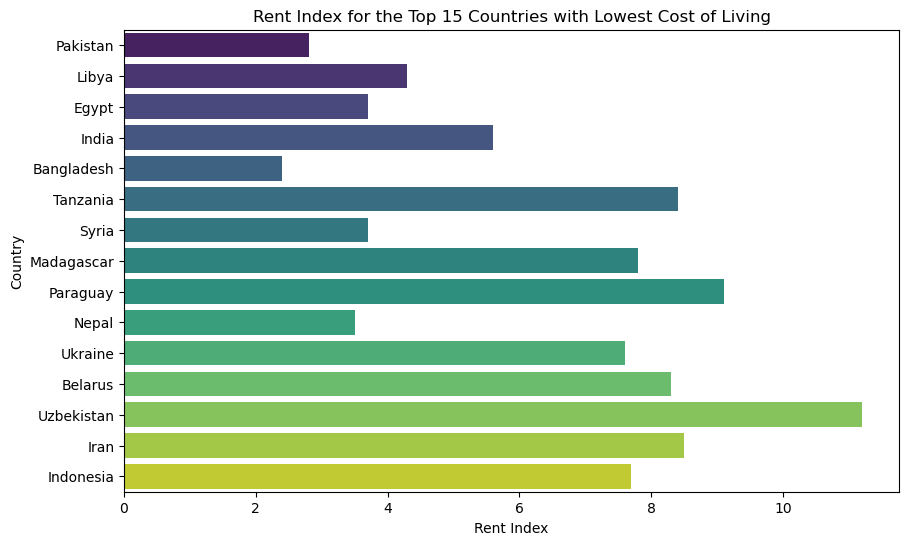

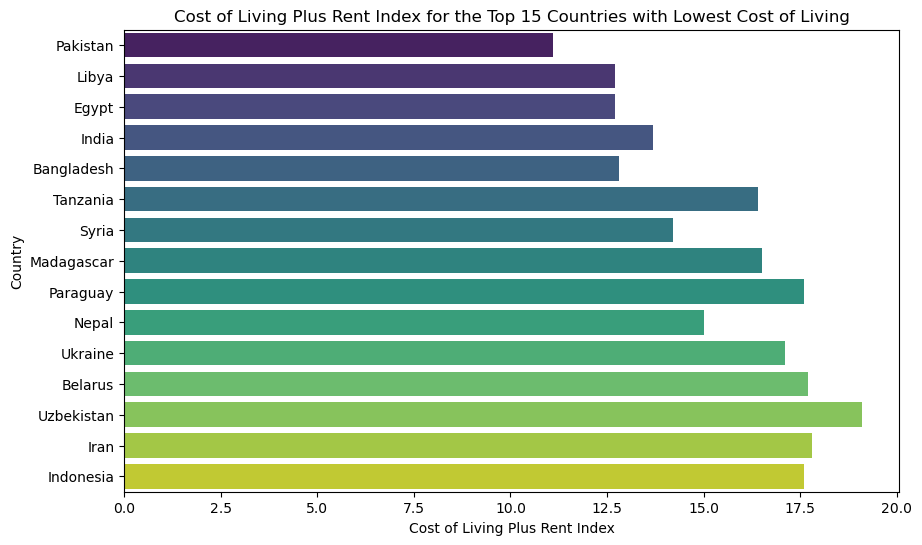

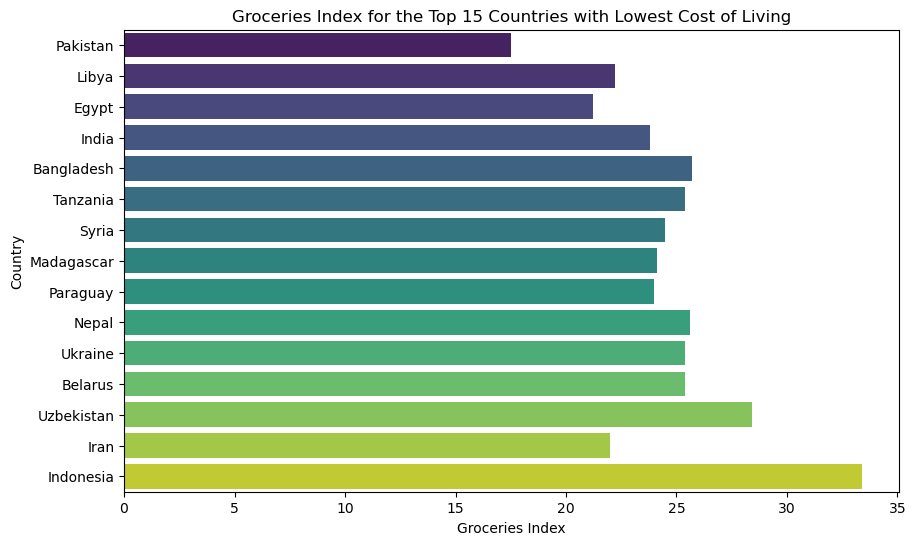

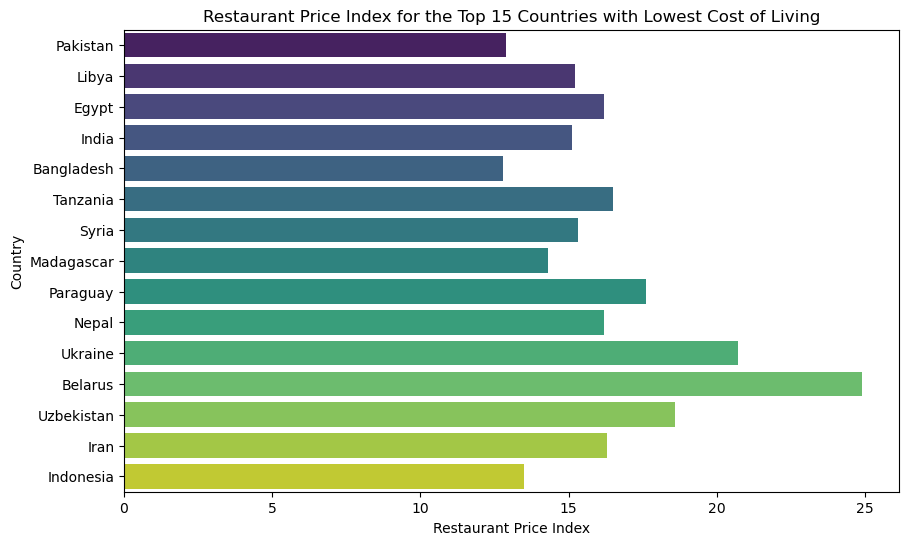

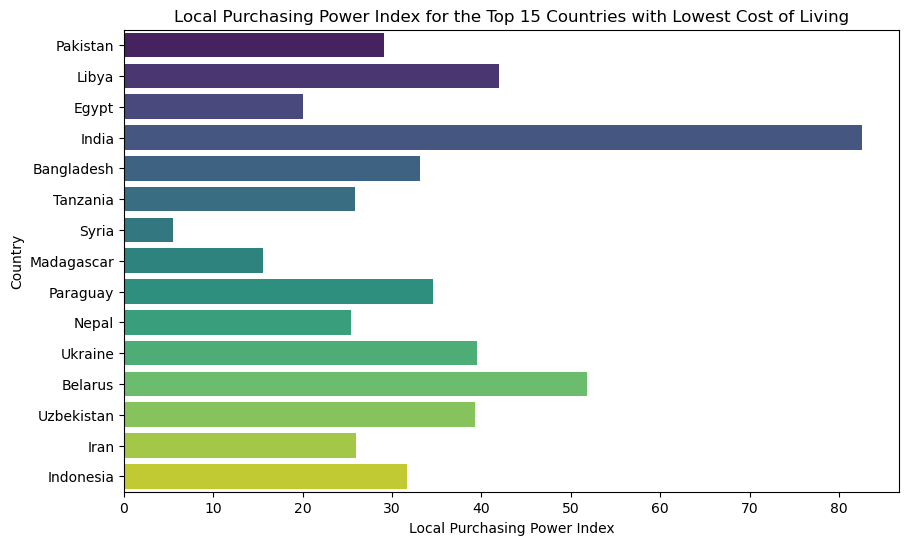

In [17]:
for a in columns:
    if a != "Cost of Living Index":
        plt.figure(figsize=(10, 6))
        sns.barplot(data=lowest_15_cts, x=a, y='Country', palette='viridis')
        plt.title(f'{a} for the Top 15 Countries with Lowest Cost of Living')
        plt.xlabel(a)
        plt.show()

<Axes: >

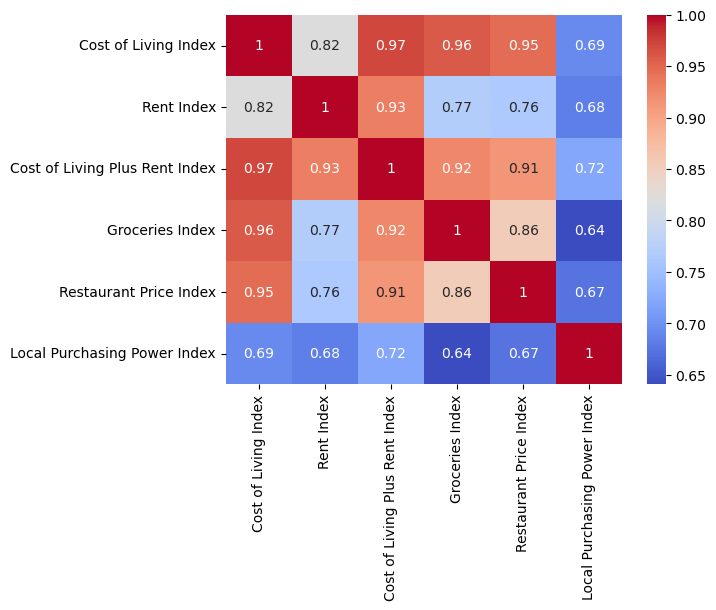

In [18]:
df_corr = df.drop("Country",axis=1)
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')

Yukarıdaki grafiklerde her bir sütunda en yüksek ve en düşük değere sahip olan ülkeleri , Cost of Living'i en yüksek ve en düşük olan 15 ülkenin diğer sütunlardaki değerlerinin nasıl olduğunu , ve sütunların birbirleri ile olan korelasyonlarını inceledik. Şimdi ise yaşamak için fiyat açısından en iyi ülkeleri bulmak için Local Purchasing Power'ı Cost of Living'e bölerek yeni bir sütun oluşturacağız.

In [19]:
df["LPP/CoL"] = df["Local Purchasing Power Index"] / df["Cost of Living Index"]

In [20]:
best_sorted = df.sort_values(by="LPP/CoL",ascending=False)

In [21]:
best_sorted[["Country","LPP/CoL"]]

,Country,LPP/CoL
Rank,,
118,India,3.896226
52,Kuwait,3.843230
51,Oman,3.297170
37,Qatar,3.140351
78,South Africa,2.979710
...,...,...
65,Venezuela,0.383812
86,Nigeria,0.350318
72,Cameroon,0.281501


LPP/Col değeri en yüksek olan ülkeler , alım gücü açısından en iyi ülkeler(Kiralar dahil değil).

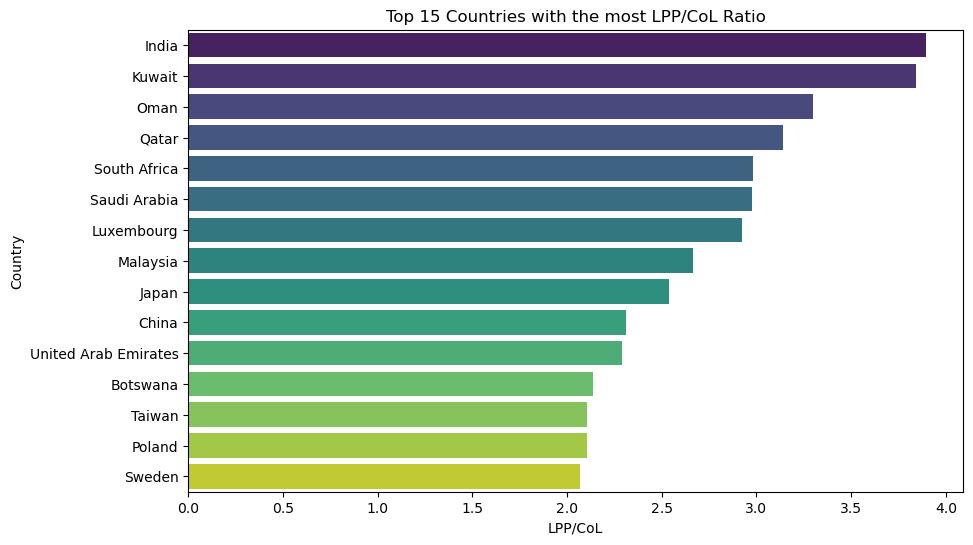

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(data=best_sorted.head(15), x="LPP/CoL", y='Country', palette='viridis')
plt.title('Top 15 Countries with the most LPP/CoL Ratio')
plt.xlabel("LPP/CoL")
plt.show()

In [23]:
df[df['Country'] == 'India']

,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,LPP/CoL
Rank,,,,,,,,
118,India,21.2,5.6,13.7,23.8,15.1,82.6,3.896226


Hindistanın değerleri şüphe uyandırdığı için son bir kez kontrol ettim fakat yanlış birşey yok gibi görünüyor.